# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [56]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [57]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | At Copenhagen the most chaotic...
1,✅ Trip Verified | Worst experience of my life...
2,✅ Trip Verified | Due to code sharing with Ca...
3,✅ Trip Verified | LHR check in was quick at t...
4,✅ Trip Verified | I wouldn't recommend Britis...


In [58]:
df.to_csv("../DS-data/BA_reviews.csv")



Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Load data

In [41]:
# load data
import pandas as pd 
import nltk

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
df = pd.read_csv('../DS-data/BA_reviews.csv')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/ankitsingh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/ankitsingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ankitsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Preprocessing

### Resources

- <a>https://amueller.github.io/aml/05-advanced-topics/13-text-data.html</a>

- <a>https://www.toptal.com/python/topic-modeling-python</a>
- <a>https://github.com/susanli2016/NLP-with-Python/blob/master/Topic%20Modeling%20for%20Data%20Preprocessing.ipynb</a>

### steps

- Remove punctuations
- Lowercase letters. Make all words lowercase. Make all words lowercase. The meaning of a word does not change regardless of its position in the sentence.

- n-grams. Consider all groups of n words in a row as new terms, called n-grams. This way, cases such as “white house” will be taken into account and added to the vocabulary list.

- Stemming. Identify prefixes and suffixes of words to isolate them from their root. This way, words like “play,” “played,” or “player” are represented by the word “play.” Stemming can be useful to reduce the number of words in the vocabulary list while preserving their meaning , but it slows preprocessing considerably because it must be applied to each word in the corpus.

- Lemmatize a document typically means to “doing things correctly” since it involves using a vocabulary and performing morphological analysis of words to remove only the inflectional ends and return the base or dictionary form of a word, which is known as the “lemma.” For example, you can expect a lemmatization algorithm to map “runs,” “running,” and “ran” to the lemma, “run.” 

- Stop words. Do not take into account groups of words lacking in meaning or utility. These include articles and prepositions but may also include words that are not useful for our specific case study, such as certain common verbs.

- Term frequency–inverse document frequency (tf–idf). Use the coefficient of tf–idf instead of noting the frequency of each word within each cell of the matrix. It consists of two numbers, multiplied:

    - tf—the frequency of a given term or word in a text, and
    - idf—the logarithm of the total number of documents divided by the number of documents that contain that given term.


## Analysis

### Creating term document matrix and cleaning data



In [62]:
# removing stop words, lemmatise the reviews
# and remove the punctuations

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

stop_words = stopwords.words('english')

stop_words = stop_words + ['ba','organization', 'would', 'article', 'could']

stop = set(stopwords.words('english'))
punct = set(string.punctuation)
lemma = WordNetLemmatizer()


def clean_the_reviews(review):

    only_review = review.split('|')[1]
    #rev_wp= regex.sub(u'', rev)

    stop_remove = ' '.join([word for word in only_review.lower().split() if word not in stop_words])
    punc_remove = ''.join([char for char in stop_remove if char not in punct])
    clean_norm  = ' '.join(lemma.lemmatize(word) for word in punc_remove.split())
    return clean_norm 

# get cleaned tokenized list of all reviews
reviews_clean = [clean_the_reviews(review).split() for review in df.reviews]

bigrams =Phrases(reviews_clean, min_count=1)


for idx in range(len(reviews_clean)):
    for token in bigram[reviews_clean[idx]]:
        if '_' in token:
            print(token)
            # Token is a bigram, add to document.
            reviews_clean[idx].append(token)



In [65]:
# Making a LDA model using gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',
                   level=logging.DEBUG)
import gensim
from gensim import corpora
# Make dictionary from clean reviews
dictionary = corpora.Dictionary(reviews_clean)

# bigrams


# get document term matrix using doc2bow bow: bag of words
doc_term_matrix = [dictionary.doc2bow(doc) for doc in reviews_clean]

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics = 10, id2word = dictionary, passes=50,eval_every = 1)



2023-04-19 20:56:13,286 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2023-04-19 20:56:13,440 : INFO : built Dictionary<7537 unique tokens: ['abysmal', 'airline', 'airport', 'assignment', 'board']...> from 1000 documents (total 76534 corpus positions)
2023-04-19 20:56:13,441 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<7537 unique tokens: ['abysmal', 'airline', 'airport', 'assignment', 'board']...> from 1000 documents (total 76534 corpus positions)", 'datetime': '2023-04-19T20:56:13.441928', 'gensim': '4.3.0', 'python': '3.10.8 (main, Mar 21 2023, 00:22:10) [GCC 11.2.0]', 'platform': 'Linux-3.10.0-1062.el7.x86_64-x86_64-with-glibc2.17', 'event': 'created'}
2023-04-19 20:56:13,912 : INFO : using symmetric alpha at 0.1
2023-04-19 20:56:13,913 : INFO : using symmetric eta at 0.1
2023-04-19 20:56:13,916 : INFO : using serial LDA version on this node
2023-04-19 20:56:13,934 : INFO : running online (multi-pass) LDA training, 10 topics, 50 passes over the sup

### approach using sklearn

In [3]:
# Initialisation of count vector and imports
from sklearn.feature_extraction.text import CountVectorizer


vect = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=3000,             # max number of uniq words)
                        )  
vects = vect.fit_transform(df.reviews)


In [4]:
td = pd.DataFrame(vects.todense()) 
td.columns = vect.get_feature_names_out()

# Transpose the matrix to get rows of words
# and columns of frequency in a review
term_document_matrix = td.T

# the columns contain the review number
term_document_matrix.columns = ['review '+str(i) for i in range(df.shape[0])]

# get total times the word appears
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

<Axes: >

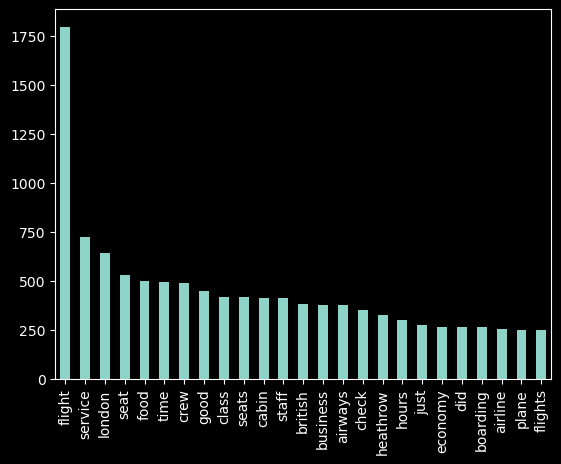

In [5]:
# Top 25 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25] 

# visualise bar plot of most common words
# this is called distribution in linguistics is called: Zipf’s Law.
term_document_matrix['total_count'].plot.bar()